"""
To use this code, just modify the **INPUT** parameters, and then hit the "START" button (little triangle) on the left.

Created on Tue Sep 15 07:42:56 2020

**Not so Uniformly spaced points on a cubic Bezier curve**

The Bezier curve is controlled with four points: 

    P0 (x0, y0)
    P1 (x1, y1)
    P2 (x2, y2)
    P3 (x3, y3)

For our purpose, the Bezier curve is symmetric to the x axis, and the lines P0P1 and P3P2 are parallel to the axi axis. Therefore,

    x0=x3=0;
    x1=x2;
    y0=y1;
    y2=y3=-y0;

In total there are three independent variables, x0, y0, and x1, with coordinates of points as below,

    P0 (x0, y0)
    P1 (x1, y0)
    P2 (x1, -y0)
    P3 (x0, -y0)
    
To split Bezier curve into equal segments, de Casteljau's algorithm is used. The code is inspired by the following post:

https://www.judosaltgenius.com/2019/01/real-control-points-have-curves

@author: juliantao
"""

The coordinates of the piles are: 
 [[[   0.       75.    ]]

 [[-114.       73.9125]]

 [[-216.       70.8   ]]

 [[-306.       65.8875]]

 [[-384.       59.4   ]]

 [[-450.       51.5625]]

 [[-504.       42.6   ]]

 [[-546.       32.7375]]

 [[-576.       22.2   ]]

 [[-594.       11.2125]]

 [[-600.        0.    ]]

 [[-594.      -11.2125]]

 [[-576.      -22.2   ]]

 [[-546.      -32.7375]]

 [[-504.      -42.6   ]]

 [[-450.      -51.5625]]

 [[-384.      -59.4   ]]

 [[-306.      -65.8875]]

 [[-216.      -70.8   ]]

 [[-114.      -73.9125]]

 [[   0.      -75.    ]]]


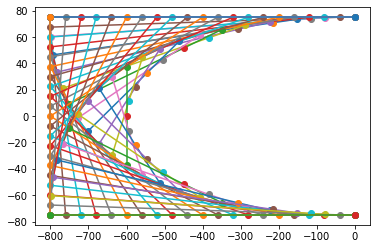

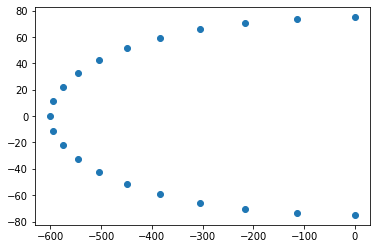

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='html5')

def find_split(this_point, next_point, t):
    return (1 - t) * this_point + t * next_point


######### INPUT  ##########################################   
W=150       #Width of the layout
L=600       #Length of the layout
N=21        #Number of minipiles 
x1=-L*4/3    #x coordinate of the control points P1 and P2
y0=W/2      #y coordinate of the control point P0
x0=0        #x coordinate of the control point P0
###########################################################   

points = [[x0, y0], [x1,y0], [x1, -y0], [x0,-y0]]
points = [np.array(p) for p in points]


t =np.linspace(0,1,num=N) # proportion

coord=[]
for j in range(N):
    plt.plot(*list(zip(*points)), 'o-')
    while len(points) > 1:
        points = [find_split(points[i], points[i+1], t[j]) for i in
              range(len(points) - 1)]
        plt.plot(*list(zip(*points)), 'o-')
    coord.append(points)
    points = [[x0, y0], [x1,y0], [x1, -y0], [x0,-y0]]
    points = [np.array(p) for p in points]
coord=np.array(coord)     
XX, YY=coord.T
######### OUTPUT  ########################################## 
print("The coordinates of the piles are: \n", coord)
plt.figure()
plt.scatter(XX, YY)
